In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [2]:
TS_CSV = './521_wrf_r_ts.csv'
CONFIG_CSV='./521_wrf_r_regret_out.csv'

In [3]:
df = pd.read_csv(TS_CSV)
df.head()


,Timestamp,run_warm_up,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,...,run_43,run_44,run_45,run_46,run_47,run_48,run_49,run_50,run_default_jemalloc,run_default_tcmalloc
0,0,0.003076,0.003394,0.003653,0.011462,0.008056,0.008221,0.009772,0.000769,0.000772,...,0.003410,0.008156,0.003433,0.003368,0.003397,0.003270,0.003410,0.003128,0.003205,0.006155
1,1,0.270050,0.268555,0.255344,0.315712,0.283618,0.288122,0.284235,0.281260,0.259564,...,0.255684,0.313697,0.269071,0.200406,0.261190,0.259259,0.256093,0.195228,0.207326,0.284527
2,2,0.221057,0.297579,0.207479,0.345794,0.302296,0.326986,0.317487,0.214818,0.287119,...,0.287343,0.228941,0.220512,0.290341,0.218539,0.214798,0.281883,0.280286,0.298617,0.303422
3,3,0.222728,0.221732,0.209354,0.247392,0.225051,0.236945,0.233236,0.216700,0.214818,...,0.211139,0.230605,0.222176,0.217186,0.216239,0.216466,0.210230,0.209377,0.223584,0.226160
4,4,0.456236,0.459075,0.436770,0.554749,0.487104,0.494744,0.526221,0.443606,0.448443,...,0.440855,0.487529,0.461859,0.450098,0.444352,0.449378,0.440167,0.437977,0.454757,0.469882


In [4]:
configs = pd.read_csv(CONFIG_CSV)
configs.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_mutex_max_spin,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_thp,je_trust_madvise,rss
0,True,True,48448,secondary,18,28,79,disabled,202,47894,554,308199,phycpu,True,default,False,1.810229
1,False,False,13665,primary,8,9,11,auto,1392,20576,75,20036985,disabled,False,never,True,-1.822626
2,False,True,33137,secondary,3,5,53,auto,2052,2268,210,29242201,percpu,True,always,False,51.033862
3,True,False,3978,disabled,22,17,37,disabled,863,29676,370,9125319,percpu,False,always,True,16.481303
4,True,True,22412,disabled,20,23,48,always,2106,16672,242,14503830,phycpu,False,default,True,13.334903


In [5]:
configs.nsmallest(5, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_mutex_max_spin,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_thp,je_trust_madvise,rss
31,True,False,42525,primary,6,18,3,auto,109,635,59,31818752,phycpu,True,default,True,-2.935242
35,False,False,41623,primary,23,14,75,auto,548,550,144,24916312,disabled,False,default,True,-2.776169
40,False,False,41855,primary,13,14,54,disabled,185,205,54,31639776,percpu,False,default,False,-2.545804
41,False,False,46214,primary,14,14,4,auto,1578,619,61,32628759,phycpu,True,never,True,-2.372839
46,False,False,41623,primary,6,16,76,auto,266,517,40,24916312,percpu,True,default,True,-2.309463


In [6]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i}' in df.columns]
selected_columns

['run_32', 'run_36', 'run_41']

In [7]:
custom_df = pd.read_csv('./521_wrf_r_custom_ts.csv')
sampled_elements = custom_df['run_custom_jemalloc']
sampled_elements = np.array(sampled_elements)
len(sampled_elements)

368

In [8]:
# sampled_elements = np.array(sampled_elements)

ts = np.array(df['Timestamp'])
max_length = max(len(sampled_elements), len(ts))
sampled_elements = np.pad(sampled_elements, (0, max_length - len(sampled_elements)), 'constant')

In [9]:
regret = np.array(df['run_default_jemalloc']) - sampled_elements
rss_score = sum(regret)
rss_score

np.float64(-0.6064453124999996)

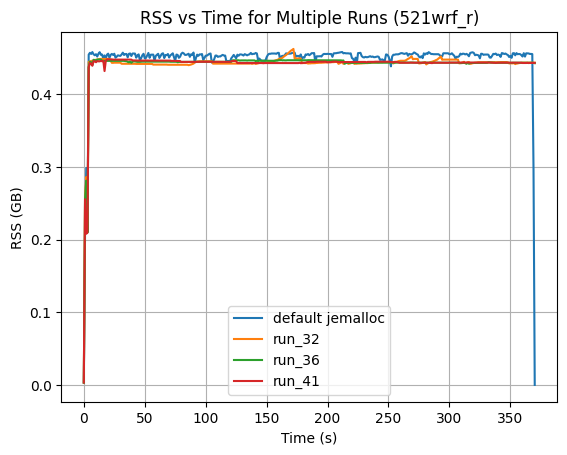

In [12]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(TS_CSV)
graph_name = TS_CSV.replace('_ts.csv', '').replace('_', '', 1)[2:]

# Extract timestamps and RSS values for each run
timestamps = df['Timestamp']
warmup = df['run_warm_up']
default = df['run_default_jemalloc']
tc_default = df['run_default_tcmalloc']

# plt.plot(timestamps, warmup / (1024*1024), label='warm_up')
plt.plot(timestamps, default, label='default jemalloc')
#plt.plot(timestamps, sampled_elements, label='high resource')
#plt.plot(timestamps, tc_default / (1024*1024), label='default tcmalloc')
for column in selected_columns:  # Skip 'Timestamp'
    plt.plot(timestamps, df[column], label=column)

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('RSS (GB)')
plt.title(f'RSS vs Time for Multiple Runs ({graph_name})')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


In [ ]:
default_conf_dict = {'je_cache_oblivious': True, 'je_metadata_thp': 'disabled', 'je_trust_madvise': False, 'je_retain': True, 'je_dss': 'secondary', 'je_narenas': 160, 'je_oversize_threshold': 8388608, 'je_background_thread': False, 'je_max_background_threads': 40, 'je_dirty_decay_ms': 10000, 'je_muzzy_decay_ms': 10000, 'je_lg_extent_max_active_fit': 6, 'je_tcache': True, 'je_lg_tcache_max': 15, 'je_thp': 'default', 'je_percpu_arena': 'default', 'je_mutex_max_spin': '1600', "je_background_thread": "false"}
default_conf_dict = dict(sorted(default_conf_dict.items()))
default_conf_dict.update({'rss': 0})
default_conf_df = pd.DataFrame([default_conf_dict])
default_conf_df

smallest_configs = configs.nsmallest(3, 'rss').copy()

# Add an identifier column to distinguish these configurations clearly
smallest_configs['config'] = selected_columns

# Add identifier to default configuration
default_conf_df['config'] = 'default'

# Concatenate vertically to compare clearly
comparison_df = pd.concat([smallest_configs, default_conf_df], ignore_index=True)

# Move 'config' column to the front and 'rss' column to the end for readability
cols = ['config'] + [col for col in comparison_df.columns if col not in ['config', 'rss']] + ['rss']
comparison_df = comparison_df[cols]

comparison_df.T

,0,1,2,3
config,run_32,run_36,run_41,default
je_background_thread,True,False,False,false
je_cache_oblivious,False,False,False,True
je_dirty_decay_ms,42525,41623,41855,10000
je_dss,primary,primary,primary,secondary
je_lg_extent_max_active_fit,6,23,13,6
je_lg_tcache_max,18,14,14,15
je_max_background_threads,3,75,54,40
je_metadata_thp,auto,auto,disabled,disabled
je_mutex_max_spin,109,548,185,1600


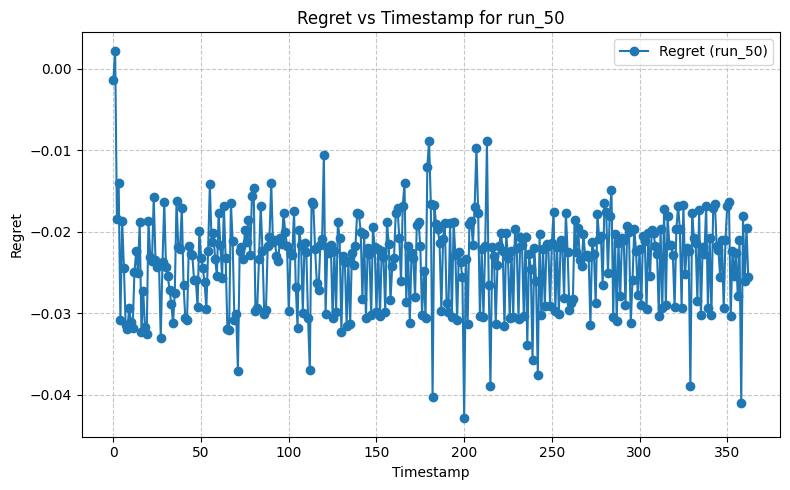

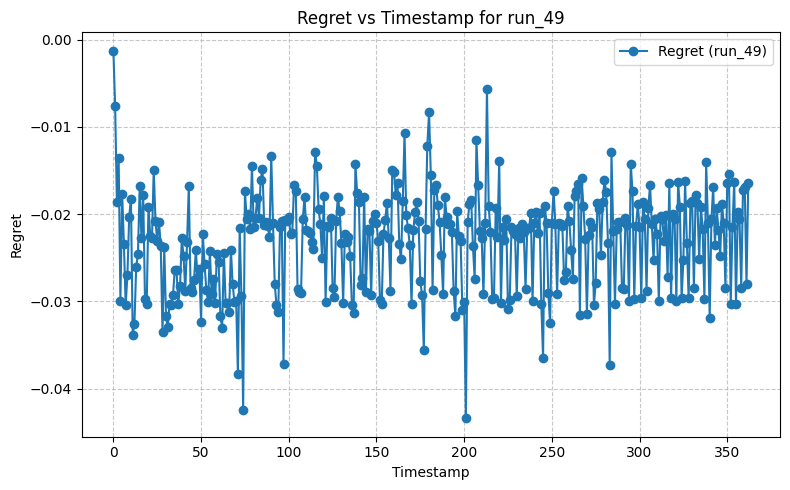

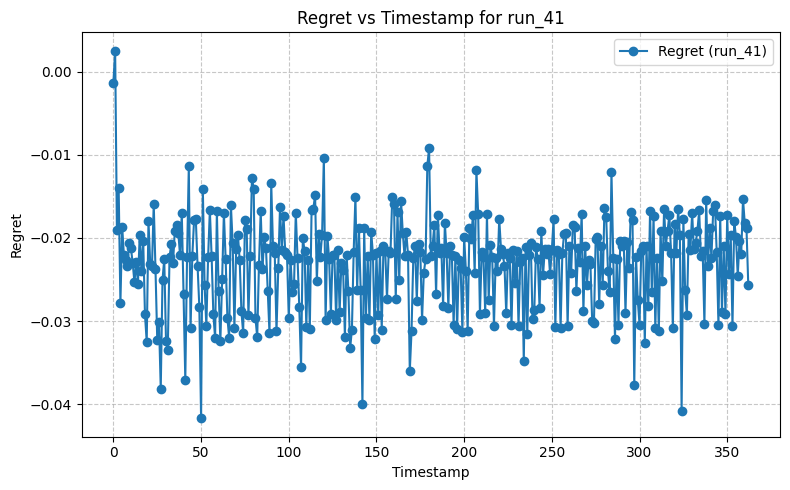

In [16]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i+1}' in df.columns]

# Step 3: Generate separate plots for each selected column
for column in selected_columns:
    # Calculate regret for the current column
    regret =  (df[column] - df['run_default_jemalloc'])
    
    # Create a new plot for this column
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the regret against the index
    ax.plot(regret.index, regret.values, marker='o', label=f'Regret ({column})')
    
    # Customize the plot
    ax.set_title(f'Regret vs Timestamp for {column}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Regret')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [3]:
TIMESERIES_FILE = './538_imagick_r_timeseries.csv'
csvfile = pd.read_csv(TIMESERIES_FILE)
timestamps = csvfile['Timestamp']
rss_values = csvfile['RSS'] / (1024*1024)

# Plotting the RSS values over time
plt.plot(timestamps, rss_values, label='RSS over Time', marker='o')
plt.xlabel('Time (s)')  # X-axis label
plt.ylabel('RSS (MB)')  # Y-axis label
plt.title('RSS vs Time')  # Title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Add a grid for better readability

# Display the plot in the notebook
plt.show()


EmptyDataError: No columns to parse from file